 ## Homework 1 - Programming Section

<b>Goal</b>: assessing in a single plot the training and testing accuracies of a decision tree, given the pd_speech.arff dataset.

### 1) Loading the data

In [46]:
import pandas as pd
from scipy.io.arff import loadarff

# Reading the arff file
data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])

df['class'] = df['class'].str.decode('utf-8')

df.head()

,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0.85247,0.71826,0.57227,240.0,239.0,0.008064,0.000087,0.00218,0.000018,0.00067,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0.76686,0.69481,0.53966,234.0,233.0,0.008258,0.000073,0.00195,0.000016,0.00052,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0.85083,0.67604,0.58982,232.0,231.0,0.008340,0.000060,0.00176,0.000015,0.00057,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,0.41121,0.79672,0.59257,178.0,177.0,0.010858,0.000183,0.00419,0.000046,0.00149,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,0.32790,0.79782,0.53028,236.0,235.0,0.008162,0.002669,0.00535,0.000044,0.00166,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


### 2) Creating the training-testing split

In [47]:
from sklearn.model_selection import train_test_split

# Separatting the features from the target
X, y = df.drop('class', axis=1), df['class']

# Generating the actual split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=1)

### 3) Feature ranking

Evaluating feature discriminative power according to mutual_info_classif()

In [48]:
from sklearn.feature_selection import mutual_info_classif

# Generating the list of information by feature
dp = mutual_info_classif(X, y, random_state=1)

print(dp[:20])

[0.         0.05265226 0.02376375 0.05270048 0.06757208 0.0640955
 0.03667444 0.04501914 0.05742102 0.03955949 0.05673383 0.04508287
 0.04695137 0.03987808 0.00271526 0.03597332 0.06646264 0.00081518
 0.02510178 0.02948285]


Creating a dictionary with feature names and discriminative power for easier asserting/sorting

In [49]:
# Initializing variables
dict1, count = {}, 0

for feature in X_train.columns.values:
    # Associating the feature with its respective information
    dict1[feature] = dp[count]
    count += 1

Sorting it in descending order and extracting the keys containing the feature names

In [50]:
dict2 = dict(sorted(dict1.items(), key=lambda item: item[1], reverse=True))
features = list(dict2.keys())

print(features[:15])

['tqwt_entropy_log_dec_35', 'std_delta_delta_log_energy', 'mean_MFCC_2nd_coef', 'std_8th_delta_delta', 'tqwt_TKEO_mean_dec_16', 'tqwt_TKEO_std_dec_12', 'tqwt_TKEO_mean_dec_11', 'tqwt_entropy_shannon_dec_35', 'tqwt_maxValue_dec_12', 'tqwt_entropy_log_dec_11', 'tqwt_stdValue_dec_15', 'tqwt_TKEO_mean_dec_12', 'tqwt_energy_dec_27', 'tqwt_stdValue_dec_12', 'tqwt_entropy_log_dec_12']


### 4) Running classifier and attesting results

In [51]:
from sklearn import tree, metrics


# Initializing variables
train, test = [], []
predictor = tree.DecisionTreeClassifier(random_state=1)

# For each number of features given in the exercise
for n in [5, 10, 40, 100, 250, 700]:
    # Training the model
    predictor.fit(X_train[features[0:n]], y_train)

    # Predicting the target for the test and training sets
    y_pred1 = predictor.predict(X_test[features[0:n]])
    y_pred2 = predictor.predict(X_train[features[0:n]])

    # Calculating the accuracy for the test and training sets
    test.append(round(metrics.accuracy_score(y_test, y_pred1), 3))
    train.append(round(metrics.accuracy_score(y_train, y_pred2), 3))

What does it look like?

In [52]:
print("training accuracy:", train)
print("Testing accuracy:", test)

training accuracy: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Testing accuracy: [0.819, 0.736, 0.771, 0.806, 0.815, 0.833]


### 5) Creating the plot

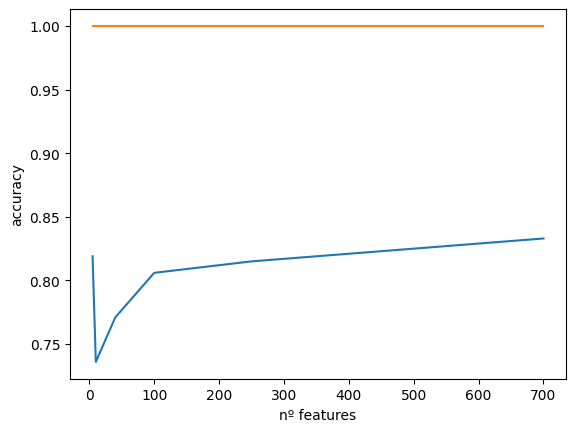

In [53]:
import matplotlib.pyplot as plt

# Creating the plot
plt.plot([5, 10, 40, 100, 250, 700], test)
plt.plot([5, 10, 40, 100, 250, 700], train)

# Labelling the axes
plt.xlabel('nº features')
plt.ylabel('accuracy')

plt.show()